In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from graphviz import Source
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from IPython.display import display

In [2]:
balance_data = pd.read_csv('../data/balance-scale/balance-scale.csv',sep= ',', header= None)
X = balance_data.values[:, 1:5]
Y = balance_data.values[:,0]

In [3]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((437, 4), (188, 4), (437,), (188,))

# GINI

In [5]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

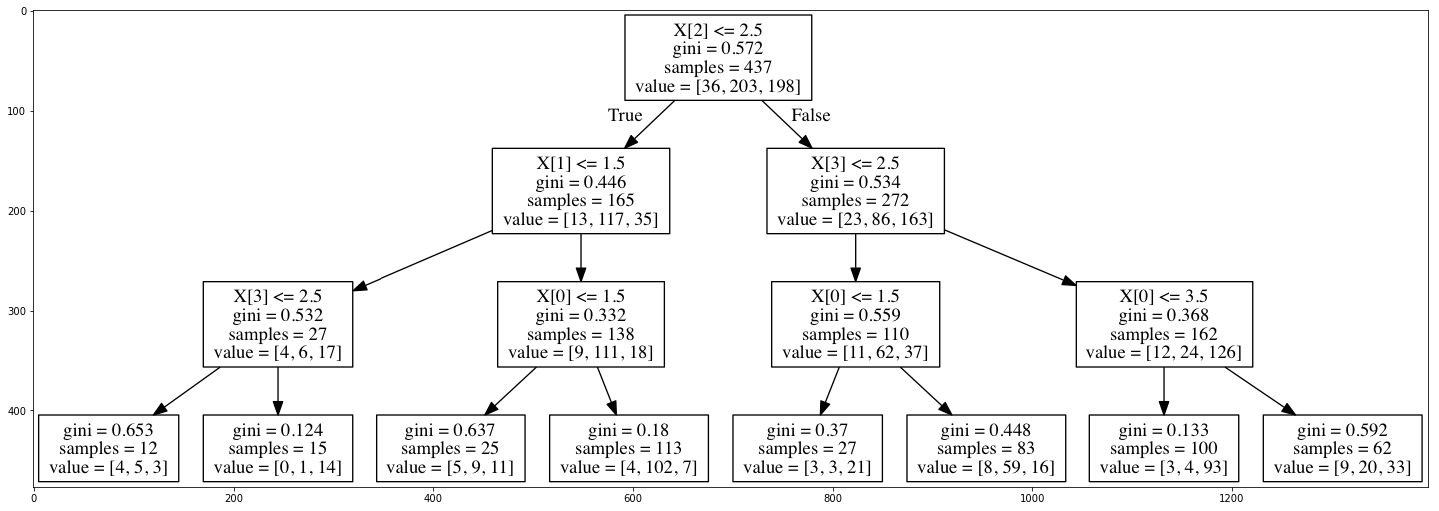

In [6]:
#with open("./gini.dot", 'w') as gini_dot_file :
    #tree.export_graphviz(clf_gini, out_file = gini_dot_file)
    
graph_gini = Source( tree.export_graphviz(clf_gini, out_file=None))
gini_png = graph_gini.pipe(format='png')
with open('gini.png','wb') as f:
    f.write(gini_png)
plt.figure(figsize=(25,10))
img=mpimg.imread('gini.png')
imgplot = plt.imshow(img)
plt.show()

In [7]:
y_pred_gini = clf_gini.predict(X_test)
gini_acc = accuracy_score(y_test,y_pred_gini)
print('Prediction accuracy with gini is {}'.format(gini_acc))

Prediction accuracy with gini is 0.7340425531914894


# Information Gain

In [8]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

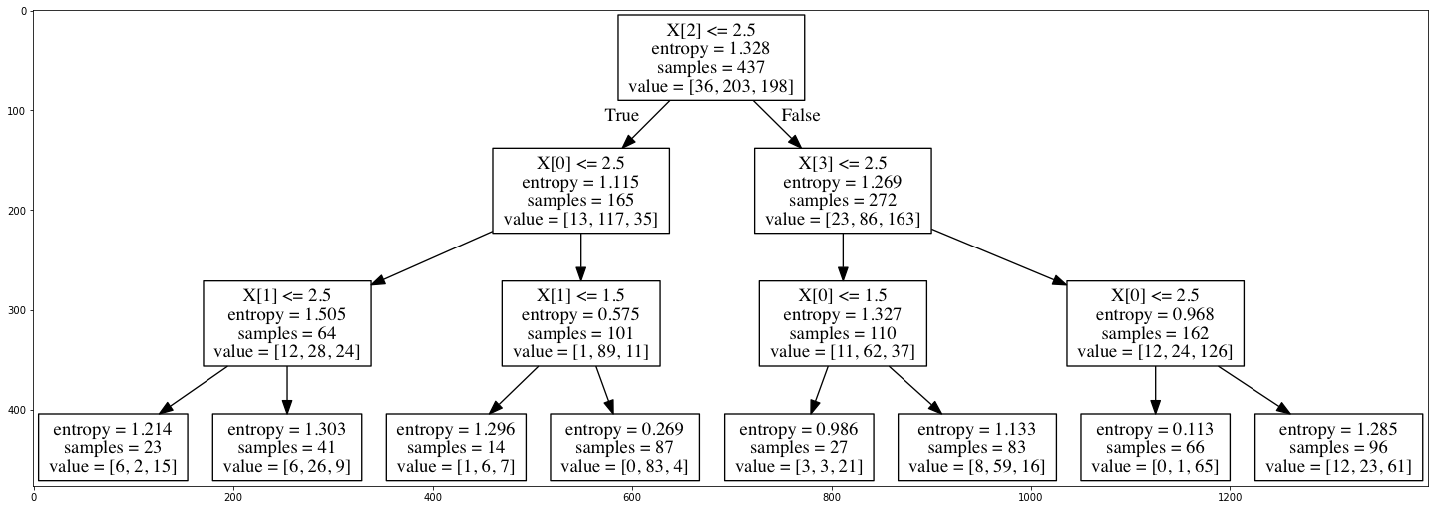

In [9]:
#with open("./entropy.dot", 'w') as entropy_dot_file :
    #tree.export_graphviz(clf_entropy, out_file = entropy_dot_file)

graph_entropy = Source( tree.export_graphviz(clf_entropy, out_file=None))
entropy_png = graph_entropy.pipe(format='png')
with open('entropy.png','wb') as f:
    f.write(entropy_png)
plt.figure(figsize=(25,10))
img=mpimg.imread('entropy.png')
imgplot = plt.imshow(img)
plt.show()

In [10]:
y_pred_entropy = clf_entropy.predict(X_test)
entropy_acc = accuracy_score(y_test,y_pred_entropy)
print('Prediction accuracy with information gain is {}'.format(entropy_acc))

Prediction accuracy with information gain is 0.7074468085106383
